In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('titanic_prepared_data.csv')

In [4]:
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,28,7.2500,0,0,1,0,0,1
1,1,0,51,71.2833,1,0,0,1,0,0
2,1,0,34,7.9250,0,0,1,0,0,1
3,1,0,47,53.1000,1,0,0,0,0,1
4,0,1,47,8.0500,0,0,1,0,0,1


# Separating Features and Labels

In [6]:
X=df.drop(['Survived'],axis = 1)
Y=df['Survived']
print X.shape, Y.shape

(891, 9) (891L,)


# Splitting into Train and Test Sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Classification & Accuracy
Logistic Regression
Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, Y_train) 
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, Y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

79.32 %


# Regularisation Constant

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf2 = LogisticRegression(C=0.08)
clf2.fit(X_train, Y_train) 
y_pred_log_reg2 = clf2.predict(X_test)
acc_log_reg2 = round( accuracy_score(y_pred_log_reg2, Y_test) * 100, 2)
print (str(acc_log_reg2) + '%')

77.97 %


# k -Nearest Neighbors
k-nearest neighbors algorithm (k-NN) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k=1k=1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train.ravel())
y_pred_knn = clf.predict(X_test)
acc_knn = round(accuracy_score(y_pred_knn, Y_test) * 100, 2)
print (str(acc_knn) + '%')

69.49 percent


# Gaussian Naive Bayes
Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, Y_train.ravel())
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(y_pred_gnb, Y_test) * 100, 2)
print (str(acc_gnb) + '%')

76.27 percent


# Decision Tree
A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, Y_test) * 100, 2)
print (str(acc_decision_tree) + '%')

77.63 percent


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred_random_forest=clf.predict(X_test)
acc_random_forest=round(accuracy_score(y_pred_random_forest, Y_test)*100,2)
print (str(acc_random_forest) + '%')


80.68 percent


In [32]:
if(acc_log_reg>acc_random_forest): 
    print("Logistic Regression has a higher accuracy than Random Forest"+"Random forest's accuracy: "+ str(acc_random_forest)+" Logistic Regression Accuracy: "+str(acc_log_reg))
else: 
    print ("Random Forest has a higher accuracy than logistic Regression. "+"Random forest's accuracy: "+ str(acc_random_forest)+" Logistic Regression Accuracy: "+str(acc_log_reg))

Random Forest has a higher accuracy than logistic Regression. Random forest's accuracy: 80.68 Logistic Regression Accuracy: 79.32


In [46]:
x=["LogisticRegression","KNN","NaiveBayes","DecisionTree","RandomForest"]
y=[acc_log_reg,acc_knn,acc_gnb,acc_decision_tree,acc_random_forest]
datadict=dict(zip(x, y))
datadict=sorted(datadict.items(), key=lambda x:x[1])
datadict=dict(datadict)
print(datadict)
df = pd.DataFrame(list(datadict.items()), columns=['Models', 'Accuracies'])

{'KNN': 69.49, 'DecisionTree': 77.63, 'LogisticRegression': 79.32, 'RandomForest': 80.68, 'NaiveBayes': 76.27}


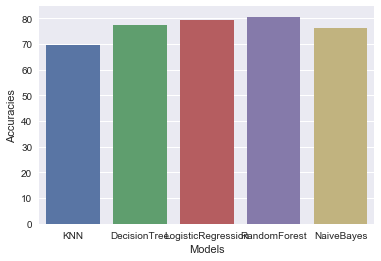

In [45]:
import seaborn as sns
sns.set()
sns.barplot(x="Models", y="Accuracies", data=df)
sns.despine()